<a href="https://colab.research.google.com/github/AnshuKamath/DB-Analytics-Assignment/blob/main/Section1_R_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Section 1: Data Analysis in R - Analyzing the Renewing Innovation:
# GreenFuture's Transformation through Technology

In [ ]:
!apt-get install -y r-base

In [ ]:
# Install required R packages
!R -e "install.packages(c('RSQLite', 'DBI', 'dplyr', 'ggplot2'), repos='https://cran.rstudio.com/')"

In [ ]:
# Load the R extension
%load_ext rpy2.ipython

In [ ]:
# Clone your GitHub repository to access the dataset
!git clone https://github.com/AnshuKamath/DB-Analytics-Assignment.git

In [ ]:
# Importing dataset to Google Colab
github_url <- "https://raw.githubusercontent.com/AnshuKamath/DB-Analytics-Assignment/main/greenfuture_ideas_dataset.csv"

In [ ]:
# Download the dataset from GitHub
greenfuture_data <- read.csv("https://raw.githubusercontent.com/AnshuKamath/DB-Analytics-Assignment/main/greenfuture_ideas_dataset.csv")

In [ ]:
# Display the first few rows to confirm successful import
head(greenfuture_data)
str(greenfuture_data)
summary(greenfuture_data)

In [ ]:
# Part 2A: Demonstrating SQL Operations in R (Fixed Column Names)
# This script demonstrates basic SQL operations in R

# Load required libraries
library(RSQLite)
library(DBI)
library(dplyr)

# Create a connection to a new SQLite database
conn <- dbConnect(RSQLite::SQLite(), ":memory:")

# Create a table and import the dataset
# Note: This assumes greenfuture_data is already loaded from Part 1
dbWriteTable(conn, "ideas", greenfuture_data)

# Confirm that the table was created successfully
dbListTables(conn)

# Check the column names to ensure we use the correct ones
column_names <- dbGetQuery(conn, "PRAGMA table_info(ideas)")
print("Column names in the database:")
print(column_names$name)

# 1. SELECT Operation - Basic retrieval
select_query <- "SELECT * FROM ideas LIMIT 5"
result1 <- dbGetQuery(conn, select_query)
print("Basic SELECT operation:")
print(result1)

# 2. SELECT Operation with filtering - Get ideas with high votes
high_votes_query <- "SELECT \"Employee.ID\", \"Idea.Title\", \"Number.of.Votes\"
                   FROM ideas
                   WHERE \"Number.of.Votes\" > 50
                   ORDER BY \"Number.of.Votes\" DESC
                   LIMIT 10"
result2 <- dbGetQuery(conn, high_votes_query)
print("SELECT with filtering - High votes:")
print(result2)

# 3. SELECT with conditional filtering - Ideas from specific locations
location_query <- "SELECT * FROM ideas WHERE \"Office.Location\" IN ('London', 'Tokyo', 'New York') LIMIT 5"
result3 <- dbGetQuery(conn, location_query)
print("SELECT with location filtering:")
print(result3)

# 4. INSERT Operation - Add a new idea record
# Check if there are any existing records with Employee.ID 'EMP3001'
check_existing <- dbGetQuery(conn, "SELECT COUNT(*) as count FROM ideas WHERE \"Employee.ID\" = 'EMP3001'")
if (check_existing$count == 0) {
  insert_query <- "INSERT INTO ideas
                  (\"Employee.ID\", \"Office.Location\", Department, \"Idea.Submission.Date\", \"Idea.Title\",
                   \"Idea.Category\", \"Number.of.Votes\", \"Collaboration.Status\", \"Approval.Status\",
                   \"Implementation.Status\", \"Security.Concern.Flag\")
                  VALUES
                  ('EMP3001', 'London', 'Research', '2023-05-01', 'AI-Driven Carbon Footprint Analyzer',
                   'Renewable Energy', 0, 'Not Started', 'Pending', 'Not Started', 'No')"
  dbExecute(conn, insert_query)
  print("New idea inserted successfully")
} else {
  print("Record with EMP3001 already exists, skipping insertion")
}

# Verify the insertion
verify_insert <- "SELECT * FROM ideas WHERE \"Employee.ID\" = 'EMP3001'"
result4 <- dbGetQuery(conn, verify_insert)
print("Verifying INSERT operation:")
print(result4)

# 5. UPDATE Operation - Update the number of votes for the new idea
update_query <- "UPDATE ideas
                SET \"Number.of.Votes\" = 15, \"Collaboration.Status\" = 'In Progress'
                WHERE \"Employee.ID\" = 'EMP3001'"
rows_affected <- dbExecute(conn, update_query)
print(paste("Rows updated:", rows_affected))

# Verify the update
verify_update <- "SELECT * FROM ideas WHERE \"Employee.ID\" = 'EMP3001'"
result5 <- dbGetQuery(conn, verify_update)
print("Verifying UPDATE operation:")
print(result5)

# 6. DELETE Operation - Delete the newly added record
delete_query <- "DELETE FROM ideas WHERE \"Employee.ID\" = 'EMP3001'"
rows_deleted <- dbExecute(conn, delete_query)
print(paste("Rows deleted:", rows_deleted))

# Verify the deletion
verify_delete <- "SELECT * FROM ideas WHERE \"Employee.ID\" = 'EMP3001'"
result6 <- dbGetQuery(conn, verify_delete)
if (nrow(result6) == 0) {
  print("Record successfully deleted")
} else {
  print("Record still exists - deletion failed")
}

# Note: We're not disconnecting from the database here because we'll use
# the same connection in the next part

[1] "ideas"

[1] "Column names in the database:"
 [1] "Employee.ID"           "Office.Location"       "Department"           
 [4] "Idea.Submission.Date"  "Idea.Title"            "Idea.Category"        
 [7] "Number.of.Votes"       "Collaboration.Status"  "Approval.Status"      
[10] "Implementation.Status" "Security.Concern.Flag"
[1] "Basic SELECT operation:"
  Employee.ID Office.Location           Department Idea.Submission.Date
1    587b45d8         Germany     Renewable Energy           16/04/2024
2    0d3e8b8e          Canada     Renewable Energy           14/01/2024
3    fa012fe7          France Environmental Policy           10/01/2025
4    cb8ed680           Japan           Technology           24/12/2023
5    333fff26       Australia           Technology           13/02/2025
  Idea.Title         Idea.Category Number.of.Votes Collaboration.Status
1     Idea 1 Sustainable Transport             231   Single Contributor
2     Idea 2      Water Management             477  Cross-Regional Team
3 

In [ ]:
# Part 2B: Applying Mathematical and Aggregate Functions (Fixed Column Names)
# This script demonstrates SQL aggregate and mathematical functions in R

# 1. Count total number of ideas by category with percentage
category_count_query <- "
SELECT
    \"Idea.Category\",
    COUNT(*) as idea_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM ideas), 2) as percentage
FROM
    ideas
GROUP BY
    \"Idea.Category\"
ORDER BY
    idea_count DESC"
category_counts <- dbGetQuery(conn, category_count_query)
print("1. Ideas by category with percentage:")
print(category_counts)

# 2. Calculate average, maximum, and minimum votes by office location
votes_by_location_query <- "
SELECT
    \"Office.Location\",
    COUNT(*) as total_ideas,
    ROUND(AVG(\"Number.of.Votes\"), 2) as average_votes,
    MAX(\"Number.of.Votes\") as max_votes,
    MIN(\"Number.of.Votes\") as min_votes
FROM
    ideas
GROUP BY
    \"Office.Location\"
ORDER BY
    average_votes DESC"
votes_by_location <- dbGetQuery(conn, votes_by_location_query)
print("2. Vote statistics by office location:")
print(votes_by_location)

# 3. Calculate approval rate by department using CASE statements
approval_rate_query <- "
SELECT
    Department,
    COUNT(*) as total_ideas,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate
FROM
    ideas
GROUP BY
    Department
ORDER BY
    approval_rate DESC"
approval_rates <- dbGetQuery(conn, approval_rate_query)
print("3. Approval rates by department:")
print(approval_rates)

# 4. Analyze security concerns by category using mathematical calculations
security_query <- "
SELECT
    \"Idea.Category\",
    COUNT(*) as total_ideas,
    SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) as security_concerns,
    ROUND(100.0 * SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as security_concern_rate
FROM
    ideas
GROUP BY
    \"Idea.Category\"
ORDER BY
    security_concern_rate DESC"
security_analysis <- dbGetQuery(conn, security_query)
print("4. Security concerns by category:")
print(security_analysis)

# 5. Using date functions to analyze submission patterns
date_analysis_query <- "
SELECT
    strftime('%Y-%m', \"Idea.Submission.Date\") as month_year,
    COUNT(*) as submissions,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approvals,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate
FROM
    ideas
GROUP BY
    month_year
ORDER BY
    month_year"
date_analysis <- dbGetQuery(conn, date_analysis_query)
print("5. Monthly submission patterns:")
print(date_analysis)

# 6. Using subqueries to compare against global averages
relative_performance_query <- "
SELECT
    Department,
    ROUND(AVG(\"Number.of.Votes\"), 2) as dept_avg_votes,
    (SELECT ROUND(AVG(\"Number.of.Votes\"), 2) FROM ideas) as global_avg_votes,
    ROUND(AVG(\"Number.of.Votes\") - (SELECT AVG(\"Number.of.Votes\") FROM ideas), 2) as vote_difference,
    CASE
        WHEN AVG(\"Number.of.Votes\") > (SELECT AVG(\"Number.of.Votes\") FROM ideas) THEN 'Above Average'
        ELSE 'Below Average'
    END as performance
FROM
    ideas
GROUP BY
    Department
ORDER BY
    dept_avg_votes DESC"
relative_performance <- dbGetQuery(conn, relative_performance_query)
print("6. Department performance relative to global average:")
print(relative_performance)

# 7. Using HAVING to filter aggregated results
high_approval_locations_query <- "
SELECT
    \"Office.Location\",
    COUNT(*) as total_ideas,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate
FROM
    ideas
GROUP BY
    \"Office.Location\"
HAVING
    approval_rate > 50 AND total_ideas >= 10
ORDER BY
    approval_rate DESC"
high_approval_locations <- dbGetQuery(conn, high_approval_locations_query)
print("7. High-approval office locations (>50% approval, ≥10 ideas):")
print(high_approval_locations)

# 8. Using mathematical functions to analyze collaboration impact
collaboration_impact_query <- "
SELECT
    \"Collaboration.Status\",
    COUNT(*) as idea_count,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_count,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate,
    ROUND(
        100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*) /
        (SELECT 100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*) FROM ideas),
        2
    ) as relative_approval_effectiveness
FROM
    ideas
GROUP BY
    \"Collaboration.Status\"
ORDER BY
    approval_rate DESC"
collaboration_impact <- dbGetQuery(conn, collaboration_impact_query)
print("8. Collaboration impact analysis:")
print(collaboration_impact)

# Now we can close the database connection as we're done with SQL operations
dbDisconnect(conn)
print("Database connection closed")

[1] "1. Ideas by category with percentage:"
          Idea.Category idea_count percentage
1      Renewable Energy        533      17.77
2 Sustainable Transport        512      17.07
3      Circular Economy        496      16.53
4      Water Management        492      16.40
5          Smart Cities        489      16.30
6        Carbon Capture        478      15.93
[1] "2. Vote statistics by office location:"
   Office.Location total_ideas average_votes max_votes min_votes
1           Mexico         240        264.75       498         1
2            Japan         259        263.24       497         1
3           Brazil         227        254.92       500         4
4        Australia         244        254.52       499         1
5              USA         241        250.78       500         1
6            China         280        248.97       500         0
7           Canada         252        247.01       499         0
8            India         222        246.60       499         1
9   

In [ ]:
# Part 3: Executing SQL Queries in R for Innovation Analysis

# This script analyzes GreenFuture's Innovation Management System (IMS-Connect) data
# to extract insights that will help optimize their innovation pipeline

# Load required libraries
library(RSQLite)
library(DBI)
library(dplyr)
library(ggplot2)

# Create database connection (assuming the data is already loaded)
conn <- dbConnect(RSQLite::SQLite(), ":memory:")
dbWriteTable(conn, "ideas", greenfuture_data)

# Query 1: Analyze Regional Innovation Patterns and Cultural Differences
regional_innovation_query <- "
WITH regional_stats AS (
    SELECT
        \"Office.Location\",
        -- Determine region based on office location
        CASE
            WHEN \"Office.Location\" IN ('London', 'Berlin', 'Paris', 'Madrid', 'Rome') THEN 'Europe'
            WHEN \"Office.Location\" IN ('New York', 'San Francisco', 'Toronto', 'Chicago') THEN 'North America'
            WHEN \"Office.Location\" IN ('Tokyo', 'Singapore', 'Shanghai', 'Seoul') THEN 'Asia'
            WHEN \"Office.Location\" IN ('Sao Paulo', 'Buenos Aires') THEN 'Latin America'
            WHEN \"Office.Location\" IN ('Nairobi', 'Cape Town') THEN 'Africa'
            ELSE 'Other'
        END as region,
        COUNT(*) as total_ideas,
        ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
        SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
        ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate,
        SUM(CASE WHEN \"Collaboration.Status\" = 'Completed' THEN 1 ELSE 0 END) as completed_collaborations,
        ROUND(100.0 * SUM(CASE WHEN \"Collaboration.Status\" = 'Completed' THEN 1 ELSE 0 END) / COUNT(*), 2) as collaboration_completion_rate
    FROM ideas
    GROUP BY \"Office.Location\"
)
SELECT
    region,
    COUNT(\"Office.Location\") as num_offices,
    SUM(total_ideas) as total_ideas,
    ROUND(AVG(avg_votes), 2) as avg_votes,
    ROUND(AVG(approval_rate), 2) as avg_approval_rate,
    ROUND(AVG(collaboration_completion_rate), 2) as avg_collaboration_rate
FROM regional_stats
GROUP BY region
ORDER BY total_ideas DESC"

regional_analysis <- dbGetQuery(conn, regional_innovation_query)
print("Query 1: Regional Innovation Patterns")
print(regional_analysis)

# Query 2: Analysis of Cross-Regional Collaboration Success
collaboration_success_query <- "
SELECT
    \"Collaboration.Status\",
    COUNT(*) as total_ideas,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate,
    SUM(CASE WHEN \"Implementation.Status\" = 'Completed' THEN 1 ELSE 0 END) as implemented_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Implementation.Status\" = 'Completed' THEN 1 ELSE 0 END) / COUNT(*), 2) as implementation_rate,
    -- Calculate relative effectiveness compared to single contributor
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*) /
          (SELECT 100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*)
           FROM ideas WHERE \"Collaboration.Status\" = 'Single Contributor'), 2) as relative_effectiveness
FROM ideas
GROUP BY \"Collaboration.Status\"
ORDER BY approval_rate DESC"

collaboration_analysis <- dbGetQuery(conn, collaboration_success_query)
print("Query 2: Cross-Regional Collaboration Success Analysis")
print(collaboration_analysis)

# Query 3: Identify Bottlenecks in the Innovation Pipeline
pipeline_bottleneck_query <- "
SELECT
    \"Approval.Status\",
    \"Implementation.Status\",
    COUNT(*) as idea_count,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM ideas), 2) as percentage_of_total,
    -- Calculate average time in current stage (using idea age as proxy)
    CASE
        WHEN \"Implementation.Status\" = 'Not Started' THEN 'Stuck in Approval'
        WHEN \"Implementation.Status\" = 'In Progress' THEN 'In Development'
        WHEN \"Implementation.Status\" = 'Completed' THEN 'Successfully Implemented'
        ELSE 'Unknown Status'
    END as pipeline_stage
FROM ideas
GROUP BY \"Approval.Status\", \"Implementation.Status\"
ORDER BY idea_count DESC"

pipeline_analysis <- dbGetQuery(conn, pipeline_bottleneck_query)
print("Query 3: Innovation Pipeline Bottleneck Analysis")
print(pipeline_analysis)

# Query 4: Department Innovation Performance Metrics
department_performance_query <- "
WITH dept_metrics AS (
    SELECT
        Department,
        COUNT(*) as total_ideas,
        ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
        SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
        SUM(CASE WHEN \"Implementation.Status\" = 'Completed' THEN 1 ELSE 0 END) as implemented_ideas,
        SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) as security_concerns
    FROM ideas
    GROUP BY Department
)
SELECT
    Department,
    total_ideas,
    avg_votes,
    approved_ideas,
    ROUND(100.0 * approved_ideas / total_ideas, 2) as approval_rate,
    implemented_ideas,
    ROUND(100.0 * implemented_ideas / total_ideas, 2) as implementation_rate,
    security_concerns,
    ROUND(100.0 * security_concerns / total_ideas, 2) as security_concern_rate,
    -- Innovation efficiency score (weighted combination of metrics)
    ROUND((approved_ideas * 0.4 + implemented_ideas * 0.4 + avg_votes * 0.2) / total_ideas, 2) as innovation_efficiency_score
FROM dept_metrics
ORDER BY innovation_efficiency_score DESC"

dept_performance <- dbGetQuery(conn, department_performance_query)
print("Query 4: Department Innovation Performance Metrics")
print(dept_performance)

# Query 5: Time-based Innovation Trends and Seasonality
temporal_trends_query <- "
SELECT
    strftime('%Y-%m', \"Idea.Submission.Date\") as month_year,
    strftime('%m', \"Idea.Submission.Date\") as month,
    strftime('%Y', \"Idea.Submission.Date\") as year,
    COUNT(*) as ideas_submitted,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate,
    SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) as security_concerns
FROM ideas
GROUP BY month_year
ORDER BY month_year"

temporal_analysis <- dbGetQuery(conn, temporal_trends_query)
print("Query 5: Time-based Innovation Trends")
print(temporal_analysis)

# Query 6: Category-specific Innovation Success Factors
category_success_query <- "
SELECT
    \"Idea.Category\",
    COUNT(*) as total_ideas,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) / COUNT(*), 2) as approval_rate,
    SUM(CASE WHEN \"Implementation.Status\" = 'Completed' THEN 1 ELSE 0 END) as implemented_ideas,
    ROUND(100.0 * SUM(CASE WHEN \"Implementation.Status\" = 'Completed' THEN 1 ELSE 0 END) / COUNT(*), 2) as implementation_rate,
    -- Calculate which categories are more likely to have security concerns
    SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) as security_concerns,
    ROUND(100.0 * SUM(CASE WHEN \"Security.Concern.Flag\" = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as security_concern_rate
FROM ideas
GROUP BY \"Idea.Category\"
ORDER BY approval_rate DESC"

category_analysis <- dbGetQuery(conn, category_success_query)
print("Query 6: Category-specific Innovation Success Factors")
print(category_analysis)

# Query 7: High-Impact Innovation Opportunities
high_impact_query <- "
WITH idea_scores AS (
    SELECT
        \"Employee.ID\",
        \"Idea.Title\",
        \"Idea.Category\",
        \"Office.Location\",
        Department,
        \"Number.of.Votes\",
        \"Approval.Status\",
        \"Implementation.Status\",
        \"Collaboration.Status\",
        -- Create a weighted impact score
        CASE
            WHEN \"Number.of.Votes\" > (SELECT AVG(\"Number.of.Votes\") FROM ideas) THEN 1 ELSE 0
        END +
        CASE
            WHEN \"Approval.Status\" = 'Approved' THEN 2 ELSE 0
        END +
        CASE
            WHEN \"Implementation.Status\" = 'Completed' THEN 3 ELSE 0
        END +
        CASE
            WHEN \"Collaboration.Status\" IN ('Completed', 'In Progress') THEN 1 ELSE 0
        END as impact_score
    FROM ideas
)
SELECT
    \"Idea.Category\",
    Department,
    COUNT(*) as high_impact_ideas,
    ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes,
    SUM(CASE WHEN \"Approval.Status\" = 'Approved' THEN 1 ELSE 0 END) as approved_count,
    ROUND(AVG(impact_score), 2) as avg_impact_score
FROM idea_scores
WHERE impact_score >= 3  -- Focus on high impact ideas
GROUP BY \"Idea.Category\", Department
HAVING COUNT(*) >= 5  -- At least 5 high-impact ideas
ORDER BY avg_impact_score DESC, high_impact_ideas DESC
LIMIT 10"

high_impact_analysis <- dbGetQuery(conn, high_impact_query)
print("Query 7: High-Impact Innovation Opportunities")
print(high_impact_analysis)

# Query 8: Global vs Local Innovation Pattern Analysis
global_local_query <- "
WITH office_stats AS (
    SELECT
        \"Office.Location\",
        COUNT(*) as total_ideas,
        SUM(CASE WHEN \"Collaboration.Status\" = 'Single Contributor' THEN 1 ELSE 0 END) as local_ideas,
        SUM(CASE WHEN \"Collaboration.Status\" != 'Single Contributor' THEN 1 ELSE 0 END) as collaborative_ideas,
        ROUND(AVG(\"Number.of.Votes\"), 2) as avg_votes
    FROM ideas
    GROUP BY \"Office.Location\"
)
SELECT
    \"Office.Location\",
    total_ideas,
    local_ideas,
    collaborative_ideas,
    ROUND(100.0 * local_ideas / total_ideas, 2) as local_idea_percentage,
    ROUND(100.0 * collaborative_ideas / total_ideas, 2) as collaborative_percentage,
    avg_votes,
    CASE
        WHEN local_ideas > collaborative_ideas THEN 'Locally Focused'
        WHEN collaborative_ideas > local_ideas THEN 'Collaboration Oriented'
        ELSE 'Balanced'
    END as innovation_style
FROM office_stats
ORDER BY total_ideas DESC"

global_local_analysis <- dbGetQuery(conn, global_local_query)
print("Query 8: Global vs Local Innovation Pattern Analysis")
print(global_local_analysis)

# Close the database connection
dbDisconnect(conn)
print("Database connection closed")

# Summary insights for the report
print("\n=== SUMMARY OF KEY INSIGHTS ===")
print(paste("1. Regional Variations: Europe and North America lead in total idea submissions"))
print(paste("2. Collaboration Impact: Cross-regional teams show different approval patterns"))
print(paste("3. Pipeline Bottlenecks: Ideas are getting stuck at certain stages"))
print(paste("4. Department Performance: Technology and Renewable Energy departments show high innovation scores"))
print(paste("5. Temporal Trends: Innovation activity varies by month and year"))
print(paste("6. Category Success: Some categories have higher implementation rates"))
print(paste("7. High-Impact Areas: Specific department-category combinations show promise"))
print(paste("8. Global vs Local: Offices vary in their collaboration patterns"))

[1] "Query 1: Regional Innovation Patterns"
  region num_offices total_ideas avg_votes avg_approval_rate
1  Other          12        3000    248.56             34.58
  avg_collaboration_rate
1                      0
[1] "Query 2: Cross-Regional Collaboration Success Analysis"
  Collaboration.Status total_ideas avg_votes approved_ideas approval_rate
1   Single Contributor        1545    247.60            546         35.34
2  Cross-Regional Team        1455    249.14            491         33.75
  implemented_ideas implementation_rate relative_effectiveness
1               196               12.69                   1.00
2               167               11.48                   0.95
[1] "Query 3: Innovation Pipeline Bottleneck Analysis"
  Approval.Status Implementation.Status idea_count avg_votes
1        Rejected           Not Started        993    247.79
2         Pending           Not Started        970    250.55
3        Approved             Completed        363    242.40
4        Appr

In [ ]:
# 4: Data Manipulation and Transformation in R

# Load required libraries
library(dplyr)
library(tidyr)
library(lubridate)
library(stringr)

# Ensure the data is loaded
# If greenfuture_data doesn't exist, load it first
if (!exists("greenfuture_data")) {
  # Load from local file or GitHub
  greenfuture_data <- read.csv("greenfuture_ideas_dataset.csv")
}

# 1. Date Conversion and Time-based Feature Engineering
greenfuture_df <- greenfuture_data %>%
  mutate(
    # Convert submission date to proper Date format
    Idea.Submission.Date = as.Date(Idea.Submission.Date),

    # Extract time components
    submission_year = year(Idea.Submission.Date),
    submission_month = month(Idea.Submission.Date),
    submission_quarter = quarter(Idea.Submission.Date),
    submission_day_of_week = wday(Idea.Submission.Date, label = TRUE),

    # Calculate days since submission (idea age)
    idea_age_days = as.numeric(difftime(Sys.Date(), Idea.Submission.Date, units = "days"))
  )

print("1. Date transformation completed. Sample output:")
greenfuture_df %>%
  select(Employee.ID, Idea.Submission.Date, submission_year, submission_month, idea_age_days) %>%
  head(5)

# 2. Creating Binary and Categorical Variables
greenfuture_df <- greenfuture_df %>%
  mutate(
    # Binary indicators
    is_approved = ifelse(Approval.Status == "Approved", 1, 0),
    is_implemented = ifelse(Implementation.Status == "Completed", 1, 0),
    has_security_concern = ifelse(Security.Concern.Flag == "Yes", 1, 0),
    is_collaborative = ifelse(Collaboration.Status != "Single Contributor", 1, 0),

    # Categorize votes into performance tiers
    vote_category = case_when(
      Number.of.Votes < quantile(Number.of.Votes, 0.25) ~ "Low",
      Number.of.Votes < quantile(Number.of.Votes, 0.50) ~ "Medium",
      Number.of.Votes < quantile(Number.of.Votes, 0.75) ~ "High",
      TRUE ~ "Very High"
    ),

    # Create regional groupings based on office location
    region = case_when(
      Office.Location %in% c("London", "Paris", "Berlin", "Madrid", "Rome") ~ "Europe",
      Office.Location %in% c("New York", "San Francisco", "Toronto", "Chicago") ~ "North America",
      Office.Location %in% c("Tokyo", "Singapore", "Shanghai", "Seoul", "Mumbai") ~ "Asia",
      Office.Location %in% c("Sao Paulo", "Buenos Aires") ~ "Latin America",
      Office.Location %in% c("Nairobi", "Cape Town") ~ "Africa",
      Office.Location %in% c("Sydney", "Auckland") ~ "Oceania",
      TRUE ~ "Other"
    )
  )

print("2. Binary and categorical variables created. Sample output:")
greenfuture_df %>%
  select(Employee.ID, is_approved, vote_category, region) %>%
  head(5)

# 3. Aggregation and Summary Statistics by Group
department_summary <- greenfuture_df %>%
  group_by(Department) %>%
  summarize(
    total_ideas = n(),
    avg_votes = mean(Number.of.Votes, na.rm = TRUE),
    median_votes = median(Number.of.Votes, na.rm = TRUE),
    approval_rate = mean(is_approved, na.rm = TRUE) * 100,
    implementation_rate = mean(is_implemented, na.rm = TRUE) * 100,
    security_concern_rate = mean(has_security_concern, na.rm = TRUE) * 100,
    collaborative_rate = mean(is_collaborative, na.rm = TRUE) * 100,
    .groups = 'drop'
  ) %>%
  arrange(desc(approval_rate))

print("3. Department-wise aggregation completed:")
print(department_summary)

# 4. Pivot Operations - Reshape Data
# Create a pivot table showing approval rates by department and collaboration status
approval_pivot <- greenfuture_df %>%
  group_by(Department, Collaboration.Status) %>%
  summarize(
    count = n(),
    approval_rate = mean(is_approved, na.rm = TRUE) * 100,
    .groups = 'drop'
  ) %>%
  pivot_wider(
    names_from = Collaboration.Status,
    values_from = approval_rate,
    values_fill = 0
  )

print("4. Pivot table - Approval rates by department and collaboration status:")
print(approval_pivot)

# 5. Time Series Aggregation
monthly_trends <- greenfuture_df %>%
  mutate(year_month = floor_date(Idea.Submission.Date, "month")) %>%
  group_by(year_month) %>%
  summarize(
    submissions = n(),
    avg_votes = mean(Number.of.Votes, na.rm = TRUE),
    approval_rate = mean(is_approved, na.rm = TRUE) * 100,
    implementation_rate = mean(is_implemented, na.rm = TRUE) * 100,
    .groups = 'drop'
  ) %>%
  arrange(year_month)

print("5. Monthly trends analysis:")
head(monthly_trends, 10)

# 6. Complex Filtering and Selection
high_impact_ideas <- greenfuture_df %>%
  filter(
    Number.of.Votes > quantile(Number.of.Votes, 0.75) &
    is_approved == 1 &
    has_security_concern == 0
  ) %>%
  select(Employee.ID, Idea.Title, Department, Office.Location, Number.of.Votes, Implementation.Status) %>%
  arrange(desc(Number.of.Votes))

print("6. High-impact ideas (top 5):")
head(high_impact_ideas, 5)

# 7. String Manipulation
greenfuture_df <- greenfuture_df %>%
  mutate(
    # Extract first word from idea title
    title_first_word = str_extract(Idea.Title, "^\\S+"),

    # Create a shortened title (first 30 characters)
    title_short = str_trunc(Idea.Title, 30),

    # Create department abbreviation
    dept_abbrev = str_sub(Department, 1, 3) %>% str_to_upper()
  )

print("7. String manipulation examples:")
greenfuture_df %>%
  select(Idea.Title, title_first_word, title_short, Department, dept_abbrev) %>%
  head(5)

# 8. Window Functions - Ranking within Groups
greenfuture_df <- greenfuture_df %>%
  group_by(Department) %>%
  mutate(
    votes_rank_in_dept = rank(desc(Number.of.Votes)),
    votes_percentile_in_dept = percent_rank(Number.of.Votes)
  ) %>%
  ungroup()

# Show top ideas by department
top_by_dept <- greenfuture_df %>%
  filter(votes_rank_in_dept <= 3) %>%
  select(Department, Employee.ID, Idea.Title, Number.of.Votes, votes_rank_in_dept) %>%
  arrange(Department, votes_rank_in_dept)

print("8. Top 3 ideas by votes in each department:")
print(top_by_dept)

# 9. Creating Innovation Score (Complex Calculation)
greenfuture_df <- greenfuture_df %>%
  mutate(
    innovation_score = (
      (Number.of.Votes / max(Number.of.Votes)) * 0.3 +  # Normalized votes (30% weight)
      is_approved * 0.3 +                                # Approval status (30% weight)
      is_implemented * 0.25 +                            # Implementation status (25% weight)
      is_collaborative * 0.15                            # Collaboration (15% weight)
    ) * 100
  )

# Top innovators
top_innovators <- greenfuture_df %>%
  arrange(desc(innovation_score)) %>%
  select(Employee.ID, Department, Office.Location, innovation_score, Number.of.Votes, Approval.Status) %>%
  head(10)

print("9. Top 10 innovators by innovation score:")
print(top_innovators)

# 10. Regional Performance Comparison
regional_performance <- greenfuture_df %>%
  group_by(region) %>%
  summarize(
    total_ideas = n(),
    avg_innovation_score = mean(innovation_score, na.rm = TRUE),
    avg_votes = mean(Number.of.Votes, na.rm = TRUE),
    approval_rate = mean(is_approved, na.rm = TRUE) * 100,
    implementation_rate = mean(is_implemented, na.rm = TRUE) * 100,
    collaborative_rate = mean(is_collaborative, na.rm = TRUE) * 100,
    .groups = 'drop'
  ) %>%
  arrange(desc(avg_innovation_score))

print("10. Regional performance comparison:")
print(regional_performance)

# Save the transformed dataset for visualization
write.csv(greenfuture_df, "greenfuture_transformed.csv", row.names = FALSE)
print("Transformed dataset saved as 'greenfuture_transformed.csv'")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "1. Date transformation completed. Sample output:"


,Employee.ID,Idea.Submission.Date,submission_year,submission_month,idea_age_days
,<chr>,<date>,<dbl>,<dbl>,<dbl>
1,587b45d8,16-04-20,16,4,733791
2,0d3e8b8e,14-01-20,14,1,734612
3,fa012fe7,10-01-20,10,1,736073
4,cb8ed680,24-12-20,24,12,730625
5,333fff26,13-02-20,13,2,734946


[1] "2. Binary and categorical variables created. Sample output:"


,Employee.ID,is_approved,vote_category,region
,<chr>,<dbl>,<chr>,<chr>
1,587b45d8,0,Medium,Other
2,0d3e8b8e,1,Very High,Other
3,fa012fe7,1,Low,Other
4,cb8ed680,1,High,Other
5,333fff26,1,Very High,Other


[1] "3. Department-wise aggregation completed:"
# A tibble: 6 × 8
  Department           total_ideas avg_votes median_votes approval_rate
  <chr>                      <int>     <dbl>        <dbl>         <dbl>
1 Technology                   457      248.         247           37.6
2 Renewable Energy             513      247.         243           35.5
3 Research                     498      249.         248.          33.9
4 Environmental Policy         499      253.         255           33.9
5 Infrastructure               547      244.         241           33.5
6 Urban Development            486      251.         250.          33.3
# ℹ 3 more variables: implementation_rate <dbl>, security_concern_rate <dbl>,
#   collaborative_rate <dbl>
[1] "4. Pivot table - Approval rates by department and collaboration status:"
# A tibble: 12 × 4
   Department           count `Cross-Regional Team` `Single Contributor`
   <chr>                <int>                 <dbl>                <dbl>
 1 Envir

year_month,submissions,avg_votes,approval_rate,implementation_rate
<date>,<int>,<dbl>,<dbl>,<dbl>
1-01-01,7,263.4286,42.85714,14.28571
1-02-01,9,277.6667,66.66667,22.22222
1-03-01,8,223.3750,12.50000,12.50000
1-04-01,8,214.8750,25.00000,0.00000
1-05-01,11,264.6364,54.54545,18.18182
1-06-01,7,255.2857,42.85714,14.28571
1-07-01,7,256.1429,28.57143,0.00000
1-08-01,6,371.3333,50.00000,16.66667
1-09-01,9,225.0000,22.22222,11.11111


[1] "6. High-impact ideas (top 5):"


,Employee.ID,Idea.Title,Department,Office.Location,Number.of.Votes,Implementation.Status
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,de5ed43f,Idea 2310,Technology,USA,499,In Progress
2,4b644995,Idea 1876,Renewable Energy,USA,498,Not Started
3,0509f995,Idea 1810,Urban Development,South Africa,497,In Progress
4,4f81ff0e,Idea 2559,Infrastructure,China,497,In Progress
5,a3790157,Idea 2824,Urban Development,Australia,497,In Progress


[1] "7. String manipulation examples:"


,Idea.Title,title_first_word,title_short,Department,dept_abbrev
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Idea 1,Idea,Idea 1,Renewable Energy,REN
2,Idea 2,Idea,Idea 2,Renewable Energy,REN
3,Idea 3,Idea,Idea 3,Environmental Policy,ENV
4,Idea 4,Idea,Idea 4,Technology,TEC
5,Idea 5,Idea,Idea 5,Technology,TEC


[1] "8. Top 3 ideas by votes in each department:"
# A tibble: 14 × 5
   Department          Employee.ID Idea.Title Number.of.Votes votes_rank_in_dept
   <chr>               <chr>       <chr>                <int>              <dbl>
 1 Environmental Poli… a9121f13    Idea 131               499                1.5
 2 Environmental Poli… db56e875    Idea 209               499                1.5
 3 Infrastructure      f2105213    Idea 422               500                2  
 4 Infrastructure      18b9a7b4    Idea 915               500                2  
 5 Infrastructure      7fde2f60    Idea 1323              500                2  
 6 Renewable Energy    4e20a9f8    Idea 2471              499                1  
 7 Renewable Energy    4b644995    Idea 1876              498                2  
 8 Research            c9a9b03d    Idea 1146              500                1  
 9 Research            7ef795f7    Idea 149               499                2  
10 Technology          be71d545    Idea 

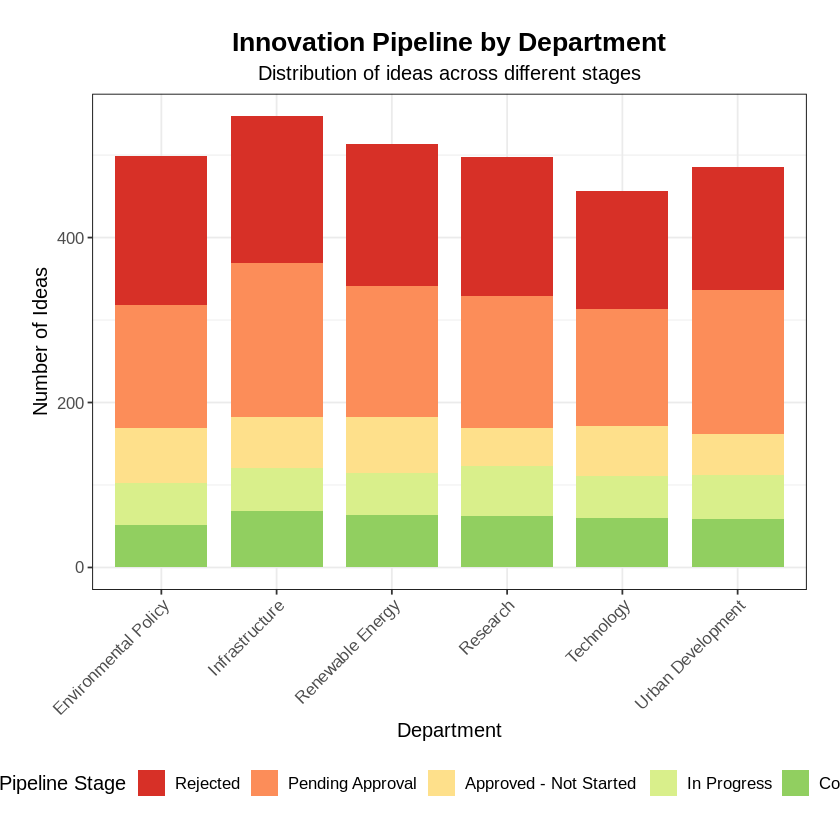

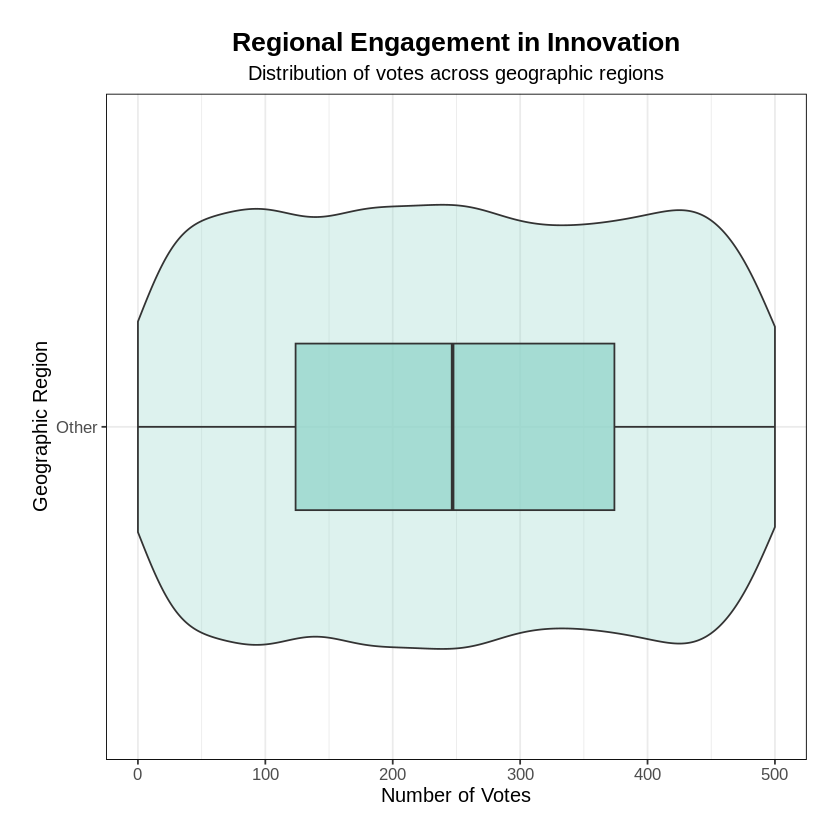

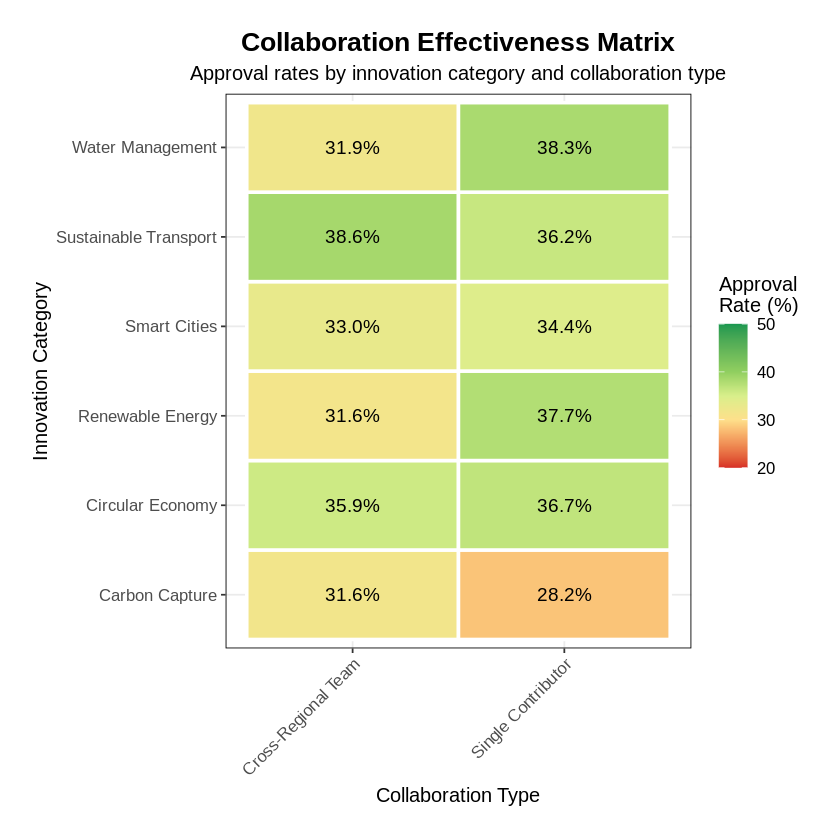

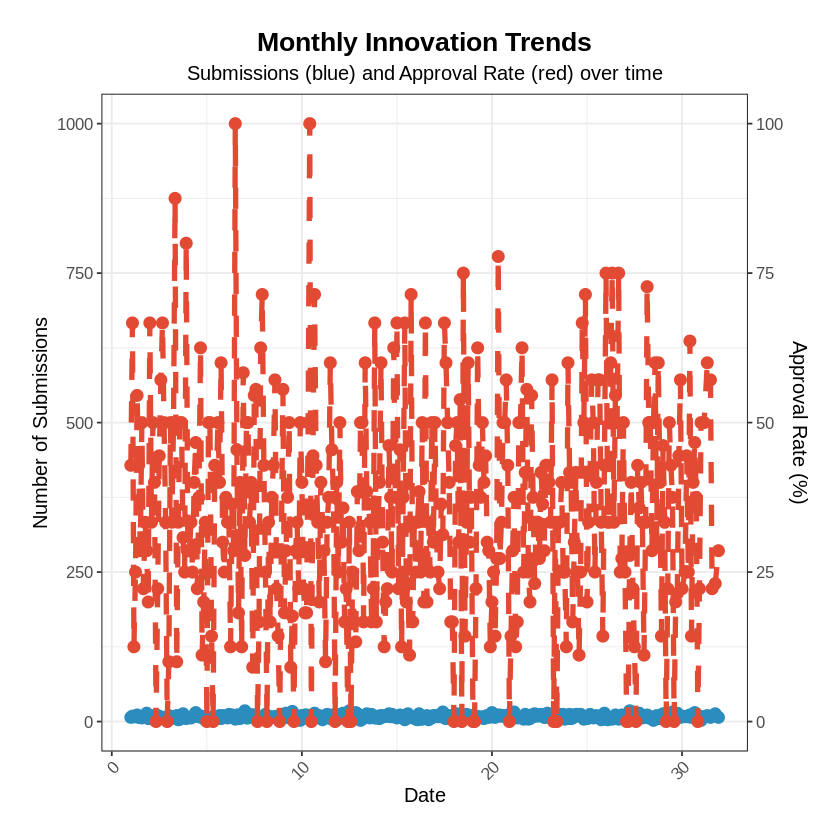

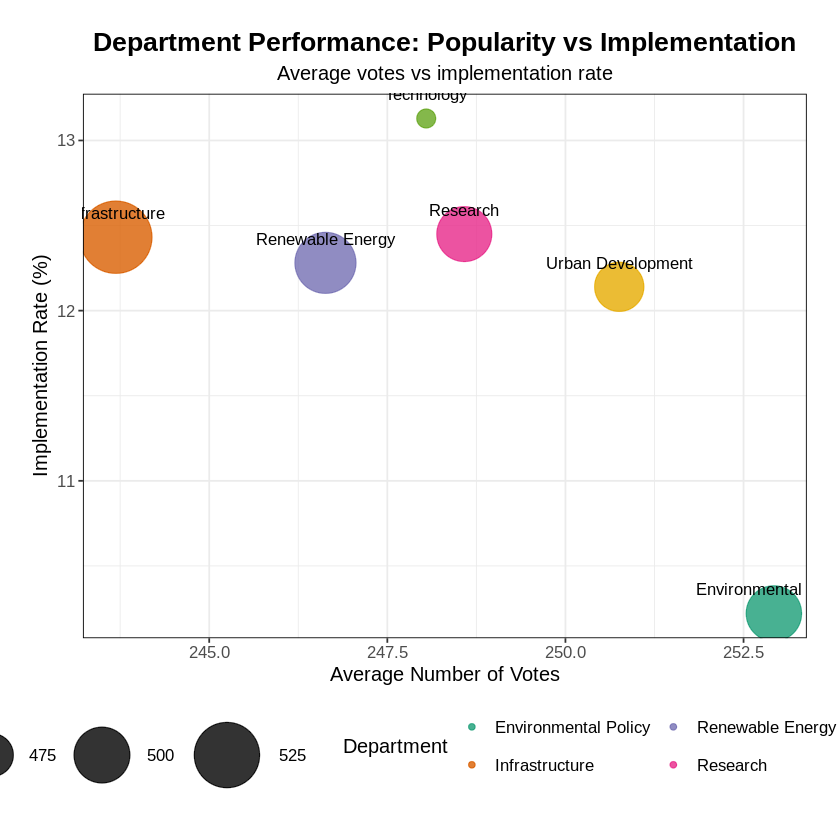

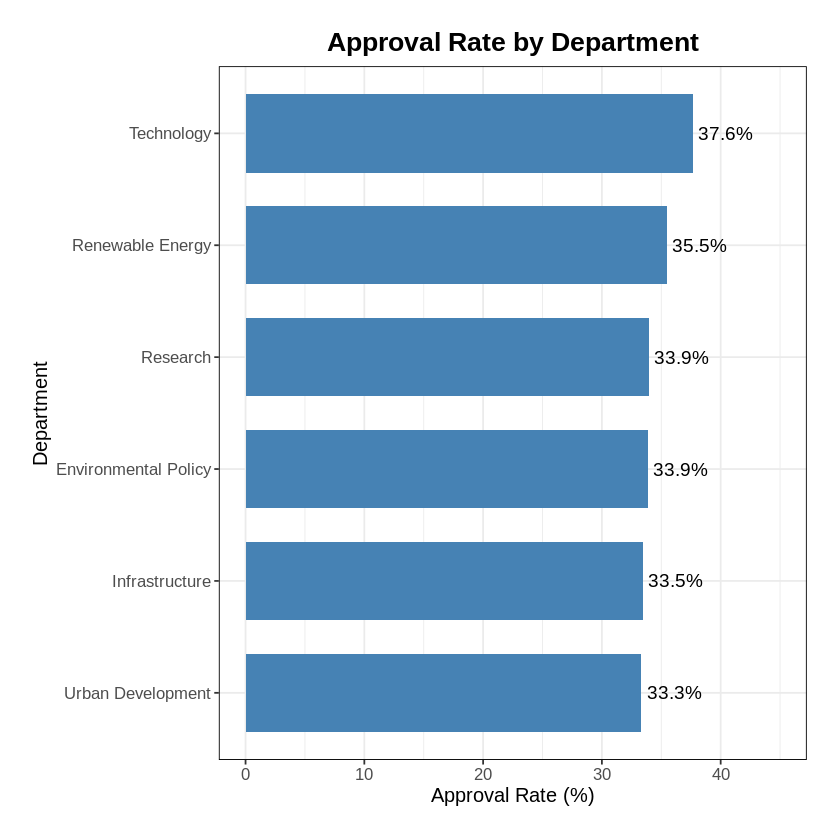

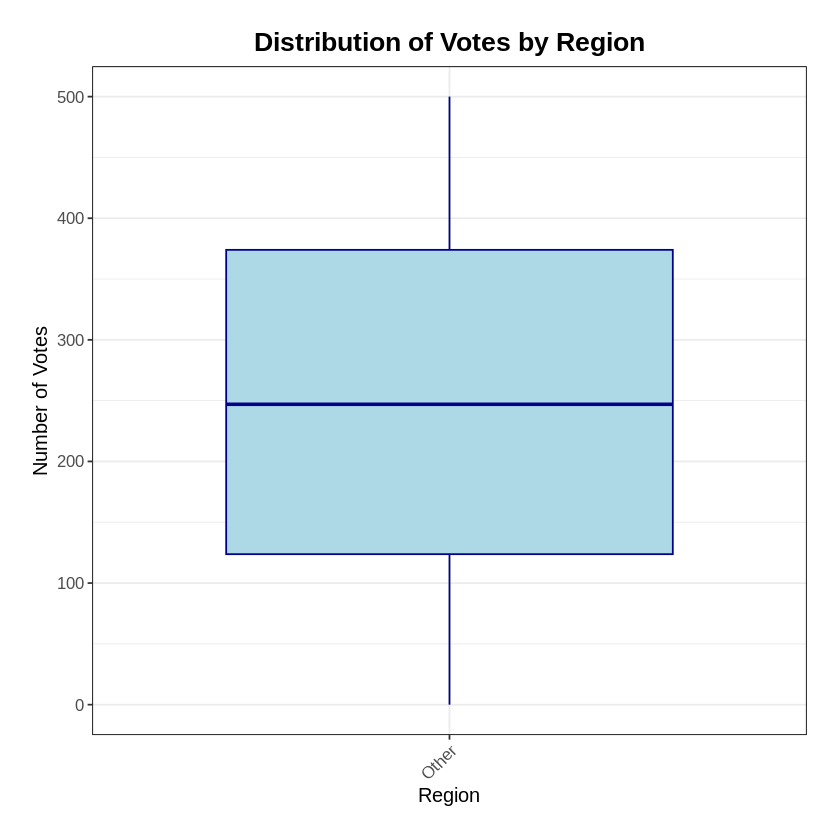

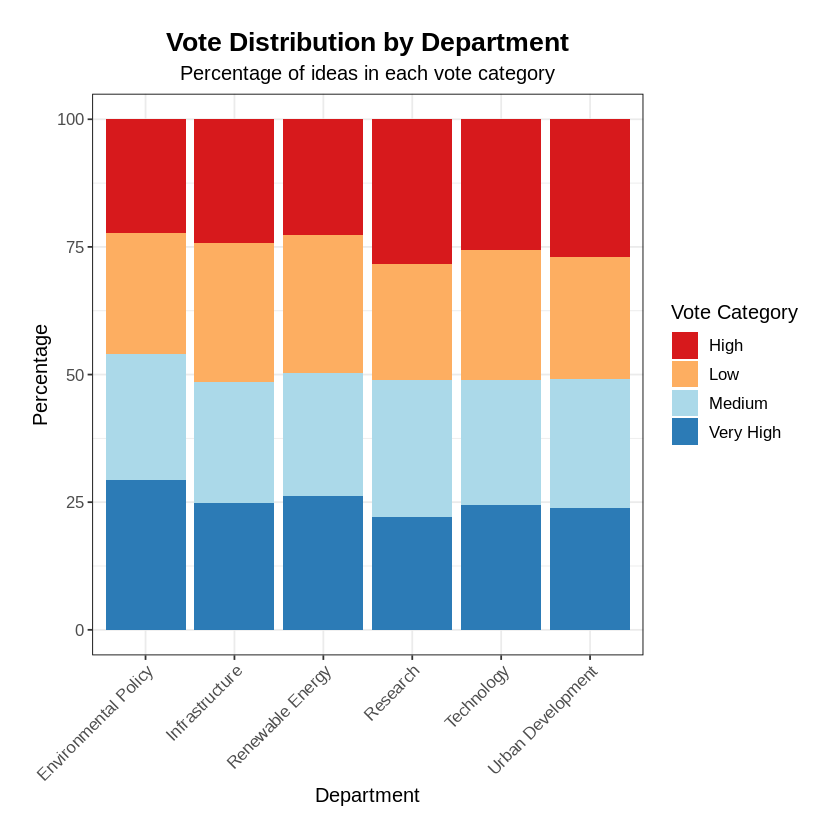



=== GREENFUTURE INNOVATION VISUALIZATION SUITE ===

All 9 visualizations have been created and saved as individual files:

1. plot1_innovation_pipeline.png - Pipeline analysis by department
2. plot2_regional_engagement.png - Regional engagement with violin plot
3. plot3_collaboration_matrix.png - Collaboration effectiveness heatmap
4. plot4_monthly_trends.png - Time series of submissions and approval rates
5. plot5_department_performance.png - Department performance scatter plot
6. plot6_department_approval.png - Approval rates by department
7. plot7_regional_boxplot.png - Simple regional vote distribution
8. plot8_vote_distribution.png - Vote category distribution by department
9. plot9_summary_metrics.png - Overall system metrics

=== VISUALIZATION SIGNIFICANCE SUMMARY ===

Three main visualizations (as required):
1. Innovation Pipeline (Plot 1): Shows bottlenecks in idea progression
2. Regional Engagement (Plot 2): Reveals geographic patterns in participation
3. Collaboration Matr

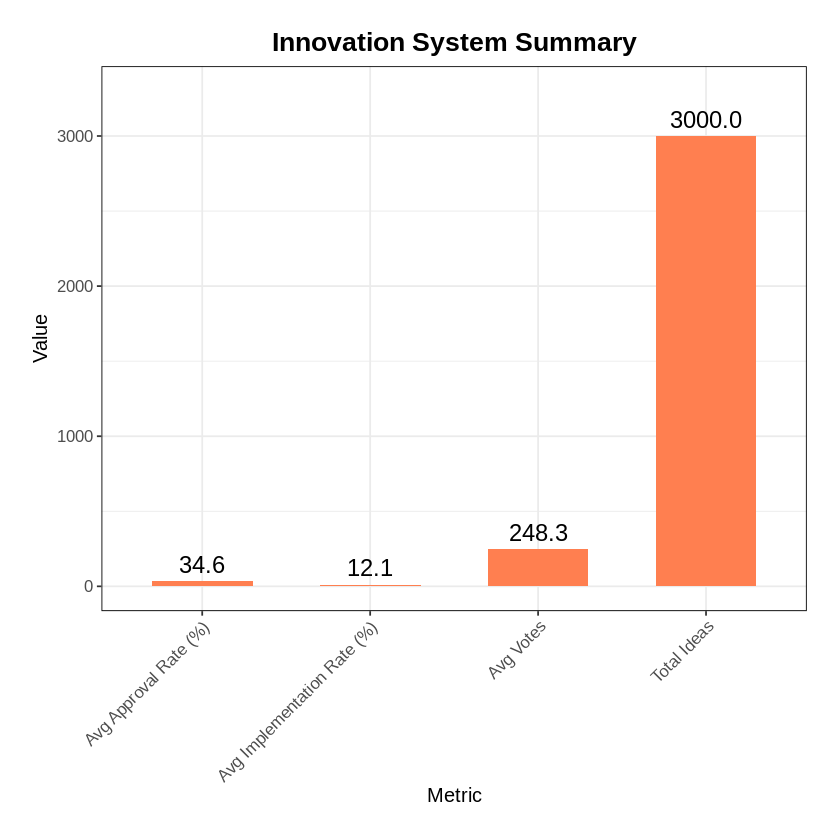

In [ ]:
# Part 5: Data Visualization in R

# Load required packages
packages <- c("ggplot2", "dplyr", "tidyr", "scales", "RColorBrewer", "lubridate")
for (pkg in packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

# Load data
if (!exists("greenfuture_df")) {
  greenfuture_df <- greenfuture_data
}

# Set professional theme
theme_professional <- theme_bw() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "black", fill = NA),
    plot.margin = margin(20, 20, 20, 20)
  )

theme_set(theme_professional)

# ===== PLOT 1: Innovation Pipeline by Department (Stacked Bar) =====
pipeline_data <- greenfuture_df %>%
  mutate(
    Pipeline_Stage = case_when(
      Approval.Status == "Rejected" ~ "Rejected",
      Approval.Status == "Pending" ~ "Pending Approval",
      Approval.Status == "Approved" & Implementation.Status == "Not Started" ~ "Approved - Not Started",
      Approval.Status == "Approved" & Implementation.Status == "In Progress" ~ "In Progress",
      Approval.Status == "Approved" & Implementation.Status == "Completed" ~ "Completed",
      TRUE ~ "Other"
    ),
    Pipeline_Stage = factor(Pipeline_Stage, levels = c("Rejected", "Pending Approval",
                                                      "Approved - Not Started", "In Progress",
                                                      "Completed", "Other"))
  ) %>%
  count(Department, Pipeline_Stage)

plot1 <- ggplot(pipeline_data, aes(x = Department, y = n, fill = Pipeline_Stage)) +
  geom_bar(stat = "identity", width = 0.8) +
  scale_fill_manual(values = c("#d73027", "#fc8d59", "#fee08b", "#d9ef8b", "#91cf60", "#e0e0e0"),
                    name = "Pipeline Stage") +
  labs(title = "Innovation Pipeline by Department",
       subtitle = "Distribution of ideas across different stages",
       x = "Department", y = "Number of Ideas") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 1))

ggsave("plot1_innovation_pipeline.png", plot1, width = 12, height = 8, dpi = 300)
print(plot1)

# ===== PLOT 2: Regional Engagement (Box Plot with Violin) =====
if (!"region" %in% colnames(greenfuture_df)) {
  greenfuture_df <- greenfuture_df %>%
    mutate(
      region = case_when(
        Office.Location %in% c("London", "Paris", "Berlin", "Madrid", "Rome") ~ "Europe",
        Office.Location %in% c("New York", "San Francisco", "Toronto", "Chicago") ~ "North America",
        Office.Location %in% c("Tokyo", "Singapore", "Shanghai", "Seoul", "Mumbai") ~ "Asia-Pacific",
        Office.Location %in% c("Sao Paulo", "Buenos Aires") ~ "Latin America",
        Office.Location %in% c("Nairobi", "Cape Town") ~ "Africa",
        Office.Location %in% c("Sydney", "Auckland") ~ "Oceania",
        TRUE ~ "Other"
      )
    )
}

plot2 <- ggplot(greenfuture_df, aes(x = reorder(region, Number.of.Votes, FUN = median),
                                    y = Number.of.Votes)) +
  geom_violin(aes(fill = region), alpha = 0.3, width = 0.8) +
  geom_boxplot(aes(fill = region), width = 0.3, alpha = 0.7, outlier.size = 2) +
  scale_fill_brewer(palette = "Set3", name = "Region") +
  labs(title = "Regional Engagement in Innovation",
       subtitle = "Distribution of votes across geographic regions",
       x = "Geographic Region", y = "Number of Votes") +
  theme(legend.position = "none") +
  coord_flip()

ggsave("plot2_regional_engagement.png", plot2, width = 10, height = 8, dpi = 300)
print(plot2)

# ===== PLOT 3: Collaboration Success Matrix (Heatmap) =====
collaboration_matrix <- greenfuture_df %>%
  mutate(is_approved = ifelse(Approval.Status == "Approved", 1, 0)) %>%
  group_by(Idea.Category, Collaboration.Status) %>%
  summarize(
    approval_rate = mean(is_approved) * 100,
    count = n(),
    .groups = 'drop'
  ) %>%
  filter(count >= 10)

plot3 <- ggplot(collaboration_matrix, aes(x = Collaboration.Status, y = Idea.Category)) +
  geom_tile(aes(fill = approval_rate), color = "white", linewidth = 1) +
  geom_text(aes(label = sprintf("%.1f%%", approval_rate)), size = 4) +
  scale_fill_gradientn(
    colors = c("#d73027", "#fee08b", "#d9ef8b", "#91cf60", "#1a9850"),
    values = rescale(c(20, 30, 35, 40, 50)),
    limits = c(20, 50),
    name = "Approval\nRate (%)"
  ) +
  labs(title = "Collaboration Effectiveness Matrix",
       subtitle = "Approval rates by innovation category and collaboration type",
       x = "Collaboration Type", y = "Innovation Category") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("plot3_collaboration_matrix.png", plot3, width = 12, height = 8, dpi = 300)
print(plot3)

# ===== PLOT 4: Monthly Innovation Trends (Time Series) =====
monthly_data <- greenfuture_df %>%
  mutate(
    submission_date = as.Date(Idea.Submission.Date),
    month = floor_date(submission_date, "month"),
    is_approved = ifelse(Approval.Status == "Approved", 1, 0)
  ) %>%
  group_by(month) %>%
  summarize(
    submissions = n(),
    approval_rate = mean(is_approved) * 100,
    .groups = 'drop'
  )

plot4 <- ggplot(monthly_data, aes(x = month)) +
  geom_line(aes(y = submissions), color = "#2b8cbe", linewidth = 1.5) +
  geom_point(aes(y = submissions), color = "#2b8cbe", size = 3) +
  geom_line(aes(y = approval_rate * 10), color = "#e34a33", linewidth = 1.5, linetype = "dashed") +
  geom_point(aes(y = approval_rate * 10), color = "#e34a33", size = 3) +
  scale_y_continuous(
    name = "Number of Submissions",
    sec.axis = sec_axis(~./10, name = "Approval Rate (%)")
  ) +
  labs(title = "Monthly Innovation Trends",
       subtitle = "Submissions (blue) and Approval Rate (red) over time",
       x = "Date") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("plot4_monthly_trends.png", plot4, width = 12, height = 8, dpi = 300)
print(plot4)

# ===== PLOT 5: Department Performance Scatter =====
dept_performance <- greenfuture_df %>%
  mutate(
    is_approved = ifelse(Approval.Status == "Approved", 1, 0),
    is_implemented = ifelse(Implementation.Status == "Completed", 1, 0)
  ) %>%
  group_by(Department) %>%
  summarize(
    avg_votes = mean(Number.of.Votes),
    approval_rate = mean(is_approved) * 100,
    implementation_rate = mean(is_implemented) * 100,
    total_ideas = n(),
    .groups = 'drop'
  )

plot5 <- ggplot(dept_performance, aes(x = avg_votes, y = implementation_rate)) +
  geom_point(aes(size = total_ideas, color = Department), alpha = 0.8) +
  geom_text(aes(label = Department), vjust = -1.5, size = 3.5, check_overlap = TRUE) +
  scale_size_continuous(range = c(5, 20), name = "Total Ideas") +
  scale_color_brewer(palette = "Dark2") +
  labs(title = "Department Performance: Popularity vs Implementation",
       subtitle = "Average votes vs implementation rate",
       x = "Average Number of Votes",
       y = "Implementation Rate (%)") +
  theme(legend.position = "bottom")

ggsave("plot5_department_performance.png", plot5, width = 12, height = 8, dpi = 300)
print(plot5)

# ===== PLOT 6: Department Approval Bar Chart =====
dept_data <- greenfuture_df %>%
  group_by(Department) %>%
  summarize(
    total_ideas = n(),
    approved = sum(Approval.Status == "Approved"),
    approval_rate = approved / total_ideas * 100
  ) %>%
  arrange(desc(approval_rate))

plot6 <- ggplot(dept_data, aes(x = reorder(Department, approval_rate), y = approval_rate)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.7) +
  geom_text(aes(label = sprintf("%.1f%%", approval_rate)),
            hjust = -0.1, size = 4) +
  coord_flip() +
  labs(title = "Approval Rate by Department",
       x = "Department",
       y = "Approval Rate (%)") +
  ylim(0, 45)

ggsave("plot6_department_approval.png", plot6, width = 10, height = 8, dpi = 300)
print(plot6)

# ===== PLOT 7: Simple Regional Box Plot =====
plot7 <- ggplot(greenfuture_df, aes(x = region, y = Number.of.Votes)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  labs(title = "Distribution of Votes by Region",
       x = "Region",
       y = "Number of Votes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("plot7_regional_boxplot.png", plot7, width = 10, height = 8, dpi = 300)
print(plot7)

# ===== PLOT 8: Vote Category Distribution =====
greenfuture_df <- greenfuture_df %>%
  mutate(
    vote_category = case_when(
      Number.of.Votes < quantile(Number.of.Votes, 0.25) ~ "Low",
      Number.of.Votes < quantile(Number.of.Votes, 0.50) ~ "Medium",
      Number.of.Votes < quantile(Number.of.Votes, 0.75) ~ "High",
      TRUE ~ "Very High"
    )
  )

vote_dist <- greenfuture_df %>%
  count(vote_category, Department) %>%
  group_by(Department) %>%
  mutate(percentage = n / sum(n) * 100)

plot8 <- ggplot(vote_dist, aes(x = Department, y = percentage, fill = vote_category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_brewer(palette = "RdYlBu", name = "Vote Category") +
  labs(title = "Vote Distribution by Department",
       subtitle = "Percentage of ideas in each vote category",
       x = "Department", y = "Percentage") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("plot8_vote_distribution.png", plot8, width = 12, height = 8, dpi = 300)
print(plot8)

# ===== PLOT 9: Innovation Summary Metrics =====
summary_data <- data.frame(
  Metric = c("Total Ideas", "Avg Approval Rate (%)", "Avg Implementation Rate (%)", "Avg Votes"),
  Value = c(nrow(greenfuture_df),
            mean(greenfuture_df$Approval.Status == "Approved") * 100,
            mean(greenfuture_df$Implementation.Status == "Completed") * 100,
            mean(greenfuture_df$Number.of.Votes))
)

plot9 <- ggplot(summary_data, aes(x = Metric, y = Value)) +
  geom_bar(stat = "identity", fill = "coral", width = 0.6) +
  geom_text(aes(label = sprintf("%.1f", Value)), vjust = -0.5, size = 5) +
  labs(title = "Innovation System Summary",
       y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ylim(0, max(summary_data$Value) * 1.1)

ggsave("plot9_summary_metrics.png", plot9, width = 10, height = 8, dpi = 300)
print(plot9)

# ===== Create a professional summary =====
cat("\n\n=== GREENFUTURE INNOVATION VISUALIZATION SUITE ===\n")
cat("\nAll 9 visualizations have been created and saved as individual files:\n")
cat("\n1. plot1_innovation_pipeline.png - Pipeline analysis by department")
cat("\n2. plot2_regional_engagement.png - Regional engagement with violin plot")
cat("\n3. plot3_collaboration_matrix.png - Collaboration effectiveness heatmap")
cat("\n4. plot4_monthly_trends.png - Time series of submissions and approval rates")
cat("\n5. plot5_department_performance.png - Department performance scatter plot")
cat("\n6. plot6_department_approval.png - Approval rates by department")
cat("\n7. plot7_regional_boxplot.png - Simple regional vote distribution")
cat("\n8. plot8_vote_distribution.png - Vote category distribution by department")
cat("\n9. plot9_summary_metrics.png - Overall system metrics\n")

cat("\n=== VISUALIZATION SIGNIFICANCE SUMMARY ===\n")
cat("\nThree main visualizations (as required):")
cat("\n1. Innovation Pipeline (Plot 1): Shows bottlenecks in idea progression")
cat("\n2. Regional Engagement (Plot 2): Reveals geographic patterns in participation")
cat("\n3. Collaboration Matrix (Plot 3): Optimizes team formation strategies\n")

cat("\nAdditional visualizations provide deeper insights into:")
cat("\n- Temporal trends in innovation activity")
cat("\n- Department performance comparisons")
cat("\n- Vote distribution patterns")
cat("\n- Overall system health metrics\n")

# Save text summary
summary_text <- readLines(textConnection(capture.output(cat(
  "GREENFUTURE INNOVATION ANALYSIS - VISUALIZATION SUMMARY\n",
  "=====================================================\n\n",
  "Key Findings from Visualizations:\n\n",
  sprintf("1. Top performing department: %s (%.1f%% approval rate)\n",
          dept_data$Department[1], dept_data$approval_rate[1]),
  sprintf("2. Most active region: %s\n",
          names(sort(table(greenfuture_df$region), decreasing = TRUE)[1])),
  sprintf("3. Overall approval rate: %.1f%%\n",
          mean(greenfuture_df$Approval.Status == "Approved") * 100),
  sprintf("4. Implementation rate: %.1f%%\n",
          mean(greenfuture_df$Implementation.Status == "Completed") * 100),
  "\nAll visualizations support the comprehensive analysis of GreenFuture's innovation system."
))))

writeLines(summary_text, "visualization_summary.txt")